<a id="dimreduction"></a>
# Dimensionality reduction -- feature engineering

## Why? The curse of dimensionality

High dimensional data is more frequent than one might first think, e.g., even a low resolution  grey scale image from the famous [MNIST datase](https://en.wikipedia.org/wiki/MNIST_database):

<a href="https://miro.medium.com/max/245/1*nlfLUgHUEj5vW7WVJpxY-g.png"><img src="https://drive.google.com/uc?export=view&id=1-XrK7beC0beocLB_NufEmKVsBbCRko88" width=250px></a>

(Image source: [Image Classification in 10 Minutes with MNIST Dataset](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d))

has 784 dimensions, as it contains intensity information for each of its $28\times 28 = 784$ pixels. Image processing is far from being the only area with high-dimensional data. For instance, the frequently used  "bag of words" representation of text documents in NLP uses a separate dimension for each word in the data set's vocabulary.

A high dimensional feature space is problematic for a number of reasons:

### Problems for visualization and exploration

We are simply not adapted to handle larger dimensional data well:
+ We are very good at recognizing patterns visually in 2 and 3 dimensional data, but we cannot really handle higher dimensional spaces.
+ A large number of our geometrical intuitions are not transferable to high dimensional spaces.

### Problems for ML algorithms 

+ For many supervised learning algorithms the number of examples needed to achieve a given level of accuracy grows exponentially with the number of dimensions (precision is proportional to data density in the feature space). $\Rightarrow$ Simply adding new features without additional data leads to overfitting!

+ More concretely, _distances_ in the feature space on which many ML algorithms  are based tend to be less and less discriminative as the number of dimensions grow. Concretely,  the effective variance \[variance/max distance\]) for the same number of uniformly distributed points in a unit cube converges to 0 as the number of dimensions grows. 


### A few cautionary tales

Consider the following table, which shows the size of a hypercube that covers the given $f$ fraction of the volume of a $[0,1]^D$ unit hypercube for a number of $D$ dimensions ($\sqrt[D]{f}$):

In [1]:
import pandas as pd

dims = list(range(1,11))
fracs = [0.2, 0.01, 0.001,0.0001]
result = []
for frac in fracs:
    result.append([frac**(1/dim) for dim in dims])
pd.DataFrame(result, columns = ["f"] +[f"{dim} dims" for dim in dims[1:]])

,f,2 dims,3 dims,4 dims,5 dims,6 dims,7 dims,8 dims,9 dims,10 dims
0,0.2000,0.447214,0.584804,0.668740,0.724780,0.764724,0.794597,0.817765,0.836251,0.851340
1,0.0100,0.100000,0.215443,0.316228,0.398107,0.464159,0.517947,0.562341,0.599484,0.630957
2,0.0010,0.031623,0.100000,0.177828,0.251189,0.316228,0.372759,0.421697,0.464159,0.501187
3,0.0001,0.010000,0.046416,0.100000,0.158489,0.215443,0.268270,0.316228,0.359381,0.398107


#### Increasing sample requirements

The figures show that if we train an ML algorithm using one feature on the 20% of a population, and start adding new features then we need dramatically more samples to maintain the same amount of coverage on the feature space: concretely, even for 3 features we'd need almost 60% of the population:

<a href="http://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png"><img src="https://drive.google.com/uc?export=view&id=1rZ3tRLxGoDRi4KgHTwaRUi5L_BSPGMx-"></a>

([image source](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/))

#### Problems with neighborhood-based methods

Let's suppose that using a KNN-like approach we predict the label of an input which is uniformly distributed in $[0,1]^D$ on the basis of the labels of examples in a small hypercube around it which contains an $f$ fraction of the examples. As the table shows, for $D=10$ dimensions and $f=0.01$ the "small" hypercube's size will be 0.63, that is, we will not really use _local_ information for determining the label at all. (The size is slightly more than 0.5 even for $f=0.001$.)

(The example is from Murphy, Machine Learning:  A probabilistic perspective (MIT, 2012))

#### Samples are pushed to the corners

Another strange effect of high dimensionality is that the ratio of normal/central examples that are close to the centroid of the population radically decreases, because of the strange behavior of hyperspheres. E.g., considering again an $[1,0]^D$ feature space and an inscribed hypersphere with an $0.5$ radius, the volume of the hypesphere, and consequently the ratio of central examples tends to 0 (even though the spheres touch all sides of the hypercubes they are inscibed in):

<a href="http://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png"><img src="https://drive.google.com/uc?export=view&id=1kud-R8BRUkKqSDxchlb5ZUIwuvfAHzQ2"></a>

<a href="http://www.visiondummy.com/wp-content/uploads/2014/04/hypersphere.png"><img src="https://drive.google.com/uc?export=view&id=1eXFwO8Kalj2xUdIXryuj42RzoVvWBpDm"></a>

([image source](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/))

#### Does this mean that ML algorithms are hopeless already for ~10 features?

Fortunately, no -- notice that the cautionary tales all assumed that the data is more or less _uniformly distributed_ in the high-dimensional space. Frequently, this is not the case: to return to our MNIST example, even a cursory glance at the examples:

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/220px-MnistExamples.png"><img src="https://drive.google.com/uc?export=view&id=1KavtxQVBVNy7WcwSAH5hVBzV5eKXy9xI" width="500px"></a>

(Image source: [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database))

shows that the data points are _not_ uniformly distributed in the 784 dimensional space, e.g., many positions are always white. The lesson is rather that high dimensional spaces can behave very counterintuitively, can cause problems for ML algorithms, and the clever exploitation of the data distribution (e.g., dense lower dimensional subspaces) is highly important for the performance of ML methods.

#### Further reading
The discussion here used the images and in a large part followed the exposition of the [The Curse of Dimensionality in classification](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/) by Vincent Spruyt at http://www.visiondummy.com which is worth reading in full.

## Types of dimensionality reduction

### Feature selection/filtering
Decrease number of features by dropping less useful ones 
- e.g. some features might have information content that is contained in other features

Good indicators:
  - **high correlation** between pairs of features
  - **low information gain**  in terms of both featues vs. only one


### Feature projection
Replace certain or all features with a lower number of new ones, containing (most of) useful information of original feature 

Data points in the original feature space represented in a new feature space 
- New feature values are __projections__ of the data points onto the axes of the new space
- Concept of "projection" not necessarily linear


In [2]:
# Iris dataset
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
# Data
import pandas as pd
import numpy as np

pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


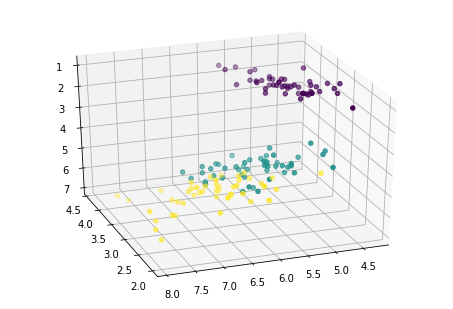

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = iris.data[:, :4]  # we only take the first two features.
Y = iris.target

fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y)

plt.show()

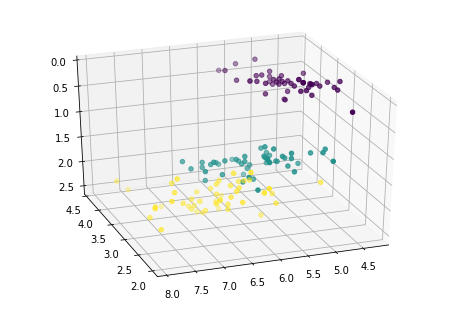

In [5]:
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=Y)

plt.show()

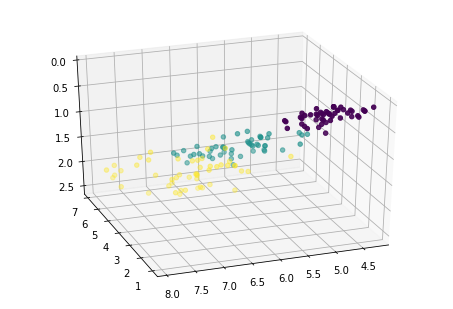

In [6]:
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 2], X[:, 3], c=Y)

plt.show()

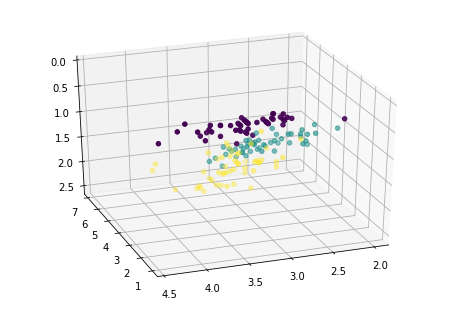

In [7]:
fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=Y)

plt.show()

## Feature projection methods

## Linear methods

- Transformation into new feature space linear
- Find new and more useful axes that can be expressed as linear combinations of basis vectors of  old feature space

### Principal Component Analysis (PCA)

- One of the most important linear dimension reduction methods for continuous features
- Finds set of orthogonal directions in the old feature space along which the variance of the data is the largest 
-> Minimizes the covariance of the data between the new directions.

The **variance** of an $A=\{a,\dots,a_{N}\}$ of a data set can be defined here as

$$
\sigma^2_A=\frac{1}{N}\sum_i (a_i - \bar{a})^2
$$

and the **covariance** of values $A=\{a_1,\dots,a_{N}\}$ and $B=\{b_1,\dots,b_{N}\}$ is 

$$
\sigma^2_{AB}=\frac{1}{N}\sum_i (a_i - \bar{a})(b_i - \bar{b})
$$

where $\bar a$ and $\bar b$ signify the means of $A$ and $B$, respectively.


<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/720px-GaussianScatterPCA.svg.png"><img src="https://drive.google.com/uc?export=view&id=1BrMrd0vb19qF_hWq1XJ0aA8ge0XEbRYQ" width="500"></a>


([source](https://en.wikipedia.org/wiki/Principal_component_analysis))


- **High variance along axes** ensures that new features have high information content
- **Low covariance between projections (guaranteed by orthogonality) onto the new axes** means that none of the new features contain  highly correlated information







#### Intuitive algorithm
1.  Find a direction in the feature space along which variance is maximal. This will be the first new basis vector (principal component).

2.  Find  another  direction  along  which  variance  is  maximized and which is orthogonal to all basis vectors found so far.

3.  Repeat Step 2 until all $m$ vectors of the basis are found.


#### Using PCA for dimension reduction
- New basis vectors PCA produces are ordered by variance
- Drop components with low variance, because they can be considered to be (mainly) noise 

<a href="http://www.nlpca.org/fig_pca_principal_component_analysis.png"><img src="https://drive.google.com/uc?export=view&id=1T-LhhvX6jv9UO07RO29DpkQ3la9iWUoG"></a>

(source: http://nlpca.org)

In [8]:
# data size
print(X.shape)

(150, 4)


In [9]:
# PCA transformation 2 dims
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

(150, 2)


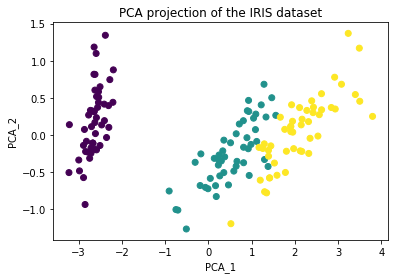

In [10]:
# Plot, 2D
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:,1], c=Y)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA projection of the IRIS dataset')
plt.show()

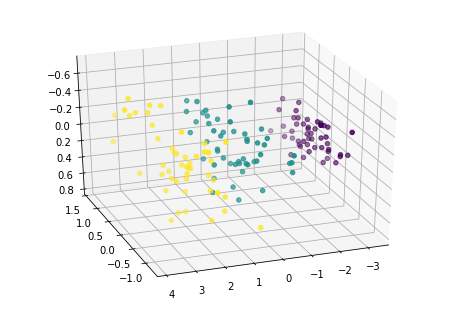

In [11]:
# Transform & plot, 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y)

plt.show()

#### PCA diagonalizes the covariance matrix  (not essential to understand in detail)

- Mathematically, PCA's finds new orthonormal basis  in which the __covariance matrix__  of the data is diagonal (all non-diagonal elements are 0). 
- Covariance matrix for a dataset $\mathbf X=\{\mathbf x_1,\dots, \mathbf x_N\}$ of $m$-dimensional vectors with data for features $F_1,\dots,F_{m}$ is the matrix 

$$ \text{Cov}(\mathbf X) = \frac{1}{N}\sum_{i=1}^N(\mathbf x_i-\bar{\mathbf x})(\mathbf x_i-\bar{\mathbf x})^T=
\begin{bmatrix}
\sigma^2_{F_1} &\cdots &\sigma^2_{F_1 F_{m}}\\
\vdots & \ddots & \vdots \\
\sigma^2_{F_m F_{1}} & \cdots & \sigma^2_{F_m}
\end{bmatrix}
$$
that is, for each cell in row $i$ and column $j$ it contains the covariance of $F_i$ and $F_j$ -- consequently  the diagonal of the matrix contains the _variances_ of the data for each feature.

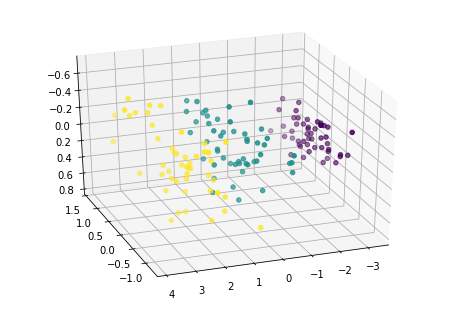

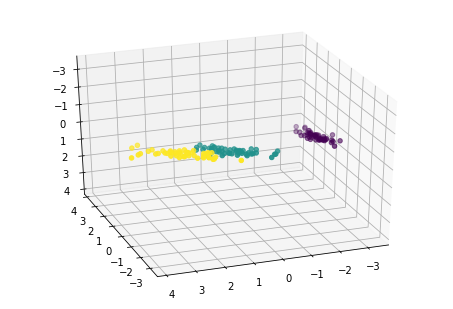

In [12]:
# Plot, 3D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_plane = pca.inverse_transform(X_pca)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca_plane = pca.fit_transform(X_plane)

fig = plt.figure(1)
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_xlim()
zmin, zmax = ax.get_xlim()

fig = plt.figure(2)
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)
ax.scatter(X_pca_plane[:, 0], X_pca_plane[:, 1], X_pca_plane[:, 2], c=Y)

plt.show()

#### Explained variance by component

- When we switch to new feature space produced by PCA, say from features $F_1, \dots, F_m$ to $P_1,\dots, P_m$  _total variance_ of our data, which is the sum of the variances along the features remains unchanged (given no components are dropped):

$$
\sum_i\sigma^2_{F_i}=\sum_i\sigma^2_{P_i}
$$

- Only distribution of total variance among features changes. 
- Accordingly, makes sense to talk about how much of the total variance of the data is along ("explained by") a PCA component/feature $P_k$: this value is simply $$\frac{\sigma^2_{P_k}}{\sum_i\sigma^2_{P_i}}$$.

Customary to use the "explained variance" percentage of components to decide which one can be omitted to reduce dimensionality.

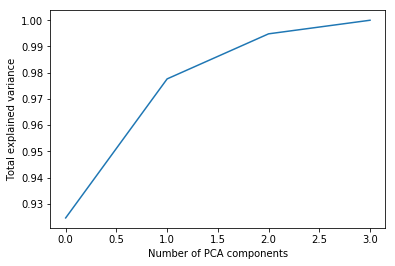

In [13]:
# Decreasing variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA components')
plt.ylabel('Total explained variance')
plt.show()

#### Reconstructing the original representation from the PCA representation

- Mapping from old feature space to new provided by PCA can be reversed 
- Using the PCA components and the new representations the original data can be reconstructed, at least approximately:

<a href="http://alexhwilliams.info/itsneuronalblog/img/pca/rank_one.png"><img src="https://drive.google.com/uc?export=view&id=1wheGkUUxAic4c2gwJ6Xj5IMKtpCyr5BE" width="900"></a>

- As more and more components are used the approximation gets more precise 
- Using all components we are guaranteed to get back exactly the original data 
- Otherwise data points replaced with their projections on the subspace determined by chosen components
- If the reconstruction not precise, PCA representation __lossy compressions__ of the original data

<a href="http://alexhwilliams.info/itsneuronalblog/img/pca/pca_3.png"><img src= "https://drive.google.com/uc?export=view&id=1TN302dZz31WZz2cEaj7VJOdDDt1xhpAq" width="900"></a>

(source: [Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/))


- Reconstruction of PCA and other linear methods useful measure of the quality of a lower dimensional representation: - -
- Reconstruct original data and measure loss, i.e., difference between reconstructed data and the original, i.e., for data $\mathbf X$, lower dimensional representations $\mathbf W$ and components $\mathbf C$ consider
 
$$
\rho(\mathbf X - \mathbf W \mathbf C)
$$
$\rho$ is an appropriate measure on matrixes 

- Typical choice is $\|\cdot\|_F^2$, Frobenius matrix norm:
- The sum of squares of all elemens in a matrix, i.e.,

$$
\| \mathbf{A} \|_F^2 = \sum_{i} \sum_{j} a_{ij}^2.$$

It can be proven that the components provided by PCA minimize this type of loss.

In [14]:
del iris

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [16]:
digits.data.shape

(1797, 64)

In [17]:
X = digits.data
pca = PCA(2)  # project from 64 to 2 dimensions
X_pca = pca.fit_transform(X)
print(X.shape)
print(X_pca.shape)

(1797, 64)
(1797, 2)


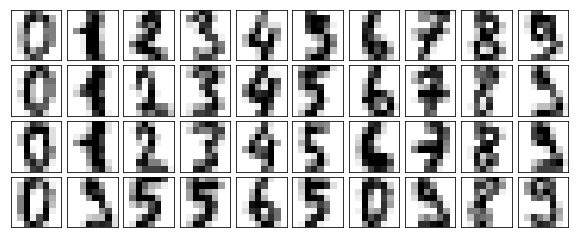

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
    plt.show()
plot_digits(X)

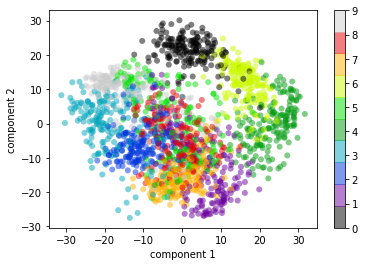

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.show()

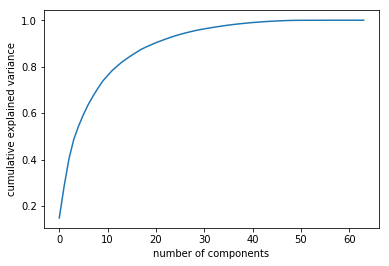

In [20]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [21]:
pca = PCA(0.90).fit(digits.data)
print(pca.n_components_)

21


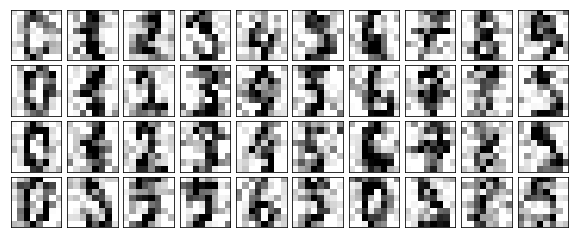

In [22]:
np.random.seed(42)
noisy = np.random.normal(X, 4)
plot_digits(noisy)

In [23]:
pca5 = PCA(0.50).fit(X)
print(pca5.n_components)

0.5


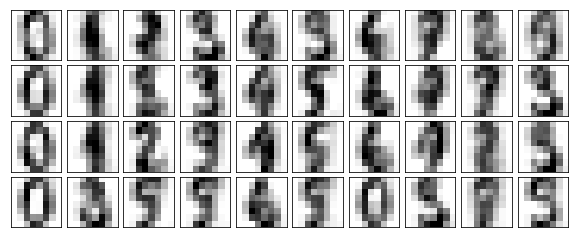

In [24]:
components = pca5.transform(noisy)
filtered = pca5.inverse_transform(components)
plot_digits(filtered)

In [25]:
del digits

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [27]:
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

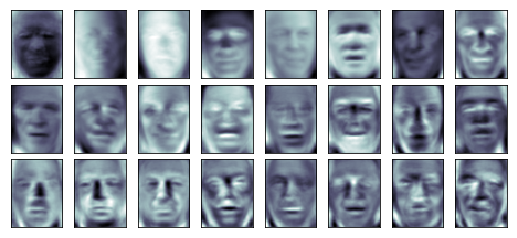

In [28]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    
plt.show()

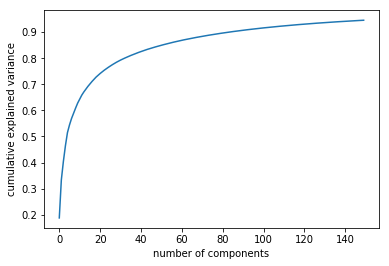

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [30]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

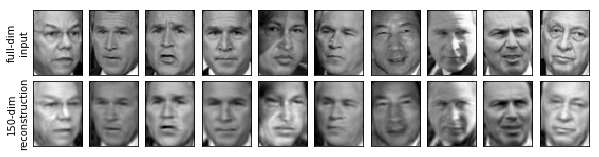

In [31]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

plt.show()

#### Further reading
+ [A very good technical PCA tutorial by Jonathon Shlens](https://arxiv.org/abs/1404.1100)

### Sparse PCA

- Disadvantage of PCA: difficult to interpret results, since produced new features typically linear combinations of _all_ original features
- Sparse PCA tries to solve problem by trying to find components which maximize variance but are sparse in the sense that they combine a low number features 

+ Sparsity is typically implemented in the objective function as an L1 penalty.
+ The orthogonality requirement of PCA is dropped.
+ Because of the L1 penalty and the connection between variance maximization and LSE (least square error) minimization problem closely related to LASSO linear regression, and is solved with similar methods

C:\Users\Florian\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:339: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 23 iterations, alpha=8.421e-02, previous alpha=8.421e-02, with an active set of 24 regressors.
  ConvergenceWarning)


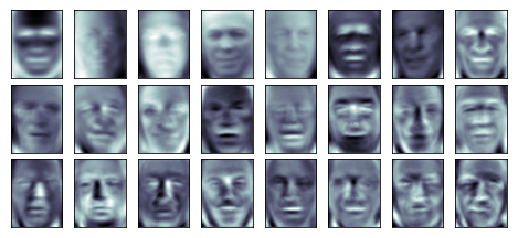

In [32]:
from sklearn.decomposition import SparsePCA
sparsePca = SparsePCA(n_components=64, alpha=0, ridge_alpha=1e-6, max_iter=200, tol=1e-3)
sparsePca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(sparsePca.components_[i].reshape(62, 47), cmap='bone')
    
plt.show()

#### Further reading

An introduction to PCA and its sparse variants:
[Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)


### Non-negative Matrix Factorization (NMF)

- Even if all values in original data non-negative, PCA and its variants frequently produce components and new representations with _negative values_
- Often undesirable: component subtraction difficult to interpret

Technically, NMF

- Solves the factorization problem $X \approx W \times H$ where $X$ is the input data matrix, $W$ is the new representation and $H$ is the component ("hidden factor") matrix.
- Often used in conjunction with sparsity inducing regularization (e.g., L1 and L2).
- The objective is to minimize the reconstruction error $||X-WH||^2_F$
- There is no closed form, analytical solution, special iterative algorithms are used, e.g., GD variants.
- The factorization is not unique, since if $B$ is invertible and $B$ and $B^{-1}$ are non-negative then $W\times H =WB\times B^{-1}H$ is also solution.



#### PCA vs NMF:

(red squares represent negative values)

<a href="http://drive.google.com/uc?export=view&id=15c9GUhTki91dujRIrfiUpHvHzxpyXYjO"><img src="https://drive.google.com/uc?export=view&id=13ajGXC2sOZwFRFH4SXPLcoKbhZMPs1-X"></a>

<a href="http://drive.google.com/uc?export=view&id=1AuQw9YU2QbZ8GuP5CS-zZZzARW-j9uzN"><img src="https://drive.google.com/uc?export=view&id=1VRpj1z-NbCakl9fQjvXJDjvZdK2bvjf_"></a>

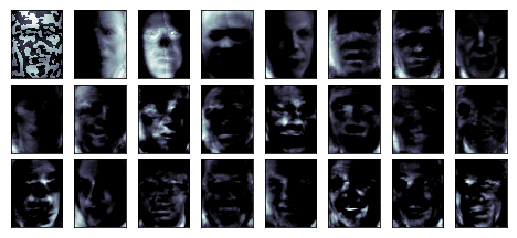

In [33]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

from sklearn.decomposition import NMF
nmf = NMF(n_components=150, init='nndsvda', tol=5e-3)
nmf.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(nmf.components_[i].reshape(62, 47), cmap='bone')
    
plt.show()

### Factor Analysis
- Factor analysis is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. 
- For example, it is possible that variations in six observed variables mainly reflect the variations in two unobserved (underlying) variables.
- The observed variables are modelled as linear combinations of the potential factors, plus "error" terms.
- Factor analysis aims to find independent latent variables


Exploratory factor analysis is used to investigate whether any factors are underlying the covariance structure among the manifest variables without making assumptions about which factors are related to which of the manifest variables.

The model used in EFA is called the common factor model, that is, a set of factors contribute to the covariance among the manifest variables. In the case of Spearman’s single factor model, suppose the manifest variable are X=(X1,…,Xp). The the single factor model is

$$
\begin{array}{ccc}
X_{1}-\mu_{1} & = & \lambda_{1} f+u_{1} \\
\vdots & & \vdots \\
X_{p}-\mu_{p} & = & \lambda_{p} f+u_{p}
\end{array}
$$


Each Xi is a vector with values across different subjects. We are subtracting it with their respective means to normalize it. Here f is an unobserved random variable called the common factor, λi (called loadings; unknown) quantifies the strength of the association between the common factor and the i-th manifest variable Xi, and ui is an unobserved random variable describes the part of Xi not explained by the common factor f. This model can be generalized to accommodate multiple factors as well. For example, a three-factor model can be written as below:


$$
\begin{array}{c}
X_{1}-\mu_{1}=\lambda_{11} f_{1}+\lambda_{12} f_{2}+\lambda_{13} f_{3}+u_{1} \\
\vdots \\
X_{p}-\mu_{p}=\lambda_{p 1} f_{1}+\lambda_{p 2} f_{2}+\lambda_{p 3} f_{3}+u_{p}
\end{array}
$$

where we now have three common factors, f1,f2 and f3. The loadings λij quantifies the relationship between the j-th common factor, fj, with the i-th manifest variable, Xi.
Our goal is to estimate/predict all the unknown components on the right-hand side of the equations.


Source: [Medium-Factor Analysis](https://medium.com/@nv199/factor-analysis-c139e7dcd0ba)

#### Factor Analysis - Geometric Interpretation (this section still needs work)



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/FactorPlot.svg/1280px-FactorPlot.svg.png" width=70%>

The parameters and variables of factor analysis can be given a geometrical interpretation. The data $({\displaystyle z_{ai}}z_{ai})$, the factors $({\displaystyle F_{pi}}F_{pi})$ and the errors $({\displaystyle \varepsilon _{ai}}\varepsilon _{ai})$ can be viewed as vectors in an ${\displaystyle N_{i}}N_{i}$-dimensional Euclidean space (sample space), represented as ${\displaystyle \mathbf {z} _{a}}\mathbf {z} _{a}$, ${\displaystyle \mathbf {F} _{p}}\mathbf {F} _{p}$ and ${\displaystyle {\boldsymbol {\varepsilon }}_{a}}{\boldsymbol {\varepsilon }}_{a}$ respectively. Since the data are standardized, the data vectors are of unit length $({\displaystyle \mathbf {z} _{a}\cdot \mathbf {z} _{a}=1}\mathbf {z} _{a}\cdot \mathbf {z} _{a}=1)$. The factor vectors define an ${\displaystyle N_{p}}N_{p}$-dimensional linear subspace (i.e. a hyperplane) in this space, upon which the data vectors are projected orthogonally. This follows from the model equation


$${\displaystyle \mathbf {z} _{a}=\sum _{p}\ell _{ap}\mathbf {F} _{p}+{\boldsymbol {\varepsilon }}_{a}}\mathbf {z} _{a}=\sum _{p}\ell _{ap}\mathbf {F} _{p}+{\boldsymbol {\varepsilon }}_{a}$$



and the independence of the factors and the errors: ${\displaystyle \mathbf {F} _{p}\cdot {\boldsymbol {\varepsilon }}_{a}=0}\mathbf {F} _{p}\cdot {\boldsymbol {\varepsilon }}_{a}=0$. In the above example, the hyperplane is just a 2-dimensional plane defined by the two factor vectors. The projection of the data vectors onto the hyperplane is given by


$${\displaystyle {\hat {\mathbf {z} }}_{a}=\sum _{p}\ell _{ap}\mathbf {F} _{p}}{\hat {\mathbf {z} }}_{a}=\sum _{p}\ell _{ap}\mathbf {F} _{p}$$


and the errors are vectors from that projected point to the data point and are perpendicular to the hyperplane. The goal of factor analysis is to find a hyperplane which is a "best fit" to the data in some sense, so it doesn't matter how the factor vectors which define this hyperplane are chosen, as long as they are independent and lie in the hyperplane. We are free to specify them as both orthogonal and normal $({\displaystyle \mathbf {F} _{p}\cdot \mathbf {F} _{q}=\delta _{pq}}\mathbf {F} _{p}\cdot \mathbf {F} _{q}=\delta _{pq})$ with no loss of generality. After a suitable set of factors are found, they may also be arbitrarily rotated within the hyperplane, so that any rotation of the factor vectors will define the same hyperplane, and also be a solution. As a result, in the above example, in which the fitting hyperplane is two dimensional, if we do not know beforehand that the two types of intelligence are uncorrelated, then we cannot interpret the two factors as the two different types of intelligence. Even if they are uncorrelated, we cannot tell which factor corresponds to verbal intelligence and which corresponds to mathematical intelligence, or whether the factors are linear combinations of both, without an outside argument.


The data vectors ${\displaystyle \mathbf {z} _{a}}\mathbf {z} _{a}$ have unit length. The correlation matrix for the data is given by ${\displaystyle r_{ab}=\mathbf {z} _{a}\cdot \mathbf {z} _{b}}r_{ab}=\mathbf {z} _{a}\cdot \mathbf {z} _{b}$. The correlation matrix can be geometrically interpreted as the cosine of the angle between the two data vectors ${\displaystyle \mathbf {z} _{a}}\mathbf {z} _{a}$ and ${\displaystyle \mathbf {z} _{b}}\mathbf {z} _{b}$. The diagonal elements will clearly be 1's and the off diagonal elements will have absolute values less than or equal to unity. The "reduced correlation matrix" is defined as

$${\hat {r}}_{ab}={\hat {\mathbf {z} }}_{a}\cdot {\hat {\mathbf {z} }}_{b}.$$


The goal of factor analysis is to choose the fitting hyperplane such that the reduced correlation matrix reproduces the correlation matrix as nearly as possible, except for the diagonal elements of the correlation matrix which are known to have unit value. In other words, the goal is to reproduce as accurately as possible the cross-correlations in the data. Specifically, for the fitting hyperplane, the mean square error in the off-diagonal components

$$\varepsilon ^{2}=\sum _{a,b\neq a}\left(r_{ab}-{\hat {r}}_{ab}\right)^{2}$$


is to be minimized, and this is accomplished by minimizing it with respect to a set of orthonormal factor vectors. It can be seen that

$$r_{ab}-{\hat {r}}_{ab}={\boldsymbol {\varepsilon }}_{a}\cdot {\boldsymbol {\varepsilon }}_{b}$$

The term on the right is just the covariance of the errors. In the model, the error covariance is stated to be a diagonal matrix and so the above minimization problem will in fact yield a "best fit" to the model: It will yield a sample estimate of the error covariance which has its off-diagonal components minimized in the mean square sense. It can be seen that since the $${\displaystyle {\hat {z}}_{a}}{\hat {z}}_{a}$$ are orthogonal projections of the data vectors, their length will be less than or equal to the length of the projected data vector, which is unity. The square of these lengths are just the diagonal elements of the reduced correlation matrix. These diagonal elements of the reduced correlation matrix are known as "communalities":

$$h_{a}^{2}={\hat {\mathbf {z} }}_{a}\cdot {\hat {\mathbf {z} }}_{a}=\sum _{p}\ell _{ap}\ell _{ap}$$

Large values of the communalities will indicate that the fitting hyperplane is rather accurately reproducing the correlation matrix. The mean values of the factors must also be constrained to be zero, from which it follows that the mean values of the errors will also be zero.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Factor_analysis)



### Linear Discriminant Analysis (LDA)

- PCA, which is an "unsupervised" method in the sense that it does not make use of a distinction of input and output variables/features (e.g. data to be classified and the correct class labels),
- LDA can be used for classified data points to find directions/components in the feature space that have good classificatory properties

#### LDA objective

Goal of LDA to find (not necessarily orthogonal) directions in the feature space which simultaneously

- maximise the distances between the means of the classes
- minimise the variance within the classes

Number of new dimensions produced by LDA depends on the number of classes and the dimensionality of original feature space: 
- for $m$ classes and $n$ original features can produce a $\min(m-1, n)$ dimensional new feature space

##### For binary classification

For a binary classification problem LDA seeks a _single_ axis in the feature space which maximizes the following value:

$$\frac{(\tilde{\mu_1}-\tilde{\mu_2})^2}{\tilde{\sigma_1}^2+\tilde{\sigma_2}^2} $$

where $\tilde{\mu_1}$ and $\tilde{\mu_2}$ are the projections of the two class centroids on the axis, and $\tilde{\sigma_1}^2$ and $\tilde{\sigma_2}^2$ are the _variances_ of the data points of the two classes along the axis.


<a href="https://i.stack.imgur.com/2A4bb.jpg"><img src="https://drive.google.com/uc?export=view&id=1stdcEkCHD2L8_K2nxSiOnzstmQK0KlKo"></a>

(source: [Stack Exchange](https://stats.stackexchange.com/questions/161362/supervised-dimensionality-reduction), original source: [UCLA Stat 101 page](http://www.stat.ucla.edu/~ybzhao/teaching/stat101c/)


##### Generalization for multiclass classification (can be jumped)

For $m>2$  classes the projections are no longer scalar, so in this case both the separation between the means of the classes and the within the class variances are represented as so called _scatter matrices_. For a given $c$ class containing the $\mathbf X_c = \{\mathbf x_1,\dots,\mathbf x_N\}$ data points with $\bar{\mathbf x}_c$ mean the _within class scatter matrix_ is

$$S_w^c=\sum_{i=1}^N(\mathbf x_i-\bar{\mathbf x}_c)(\mathbf x_i-\bar{\mathbf x}_c)^T=N~\text{Cov}(\mathbf{X}_c)$$

while the _between classes scatter matrix_ for $c$ is

$$S_b^c=N(\bar{\mathbf x}_c-\bar{\mathbf x})(\bar{\mathbf x}_c-\bar{\mathbf x})^T$$

where $\bar{\mathbf x}$ is the mean of the whole dataset. With these definitions the LDA goal for $C=\{c_1,\dots,c_m\}$ classes is to find $m-1$ axes in the original feature space for which the scatter matrices of the data points' projections maximize

$$\frac{|\sum_{c\in C} S_b^c|}{|\sum_{c\in C} S_w^c|}$$

where the $|\cdot|$ matrix operator used to get scalar values for the nominator and denominator takes the determinant of the scatter matrixes providing a  kind of "sum total scatter".

<a href="https://i.stack.imgur.com/x1wle.jpg"><img src="https://drive.google.com/uc?export=view&id=1N1xNiiftzSOXgcci22MzaK6gR0Qnm160"></a>

(source: [StackExchange](https://stats.stackexchange.com/questions/22884/how-does-linear-discriminant-analysis-reduce-the-dimensions))

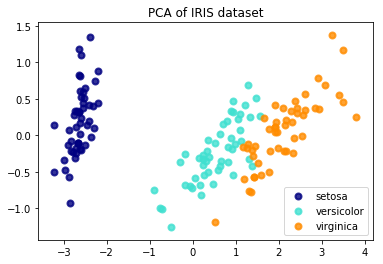

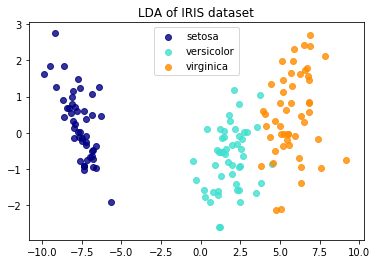

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure(1)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure(2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

#### Further reading

[Tharwat, Alaa, et al. "Linear discriminant analysis: A detailed tutorial." AI communications 30.2 (2017)](https://www.researchgate.net/publication/316994943_Linear_discriminant_analysis_A_detailed_tutorial)

### Differences between PCA, Factor Analysis and LDA

-	LDA =>  This method identifies components (i.e., linear combination of the observed variables) that maximize class separation (i.e. between-class variance) when such prior information is available (i.e., supervised). E.g., you have a training set containing a variable specifying the class of each observation.
-	PCA => Aims to find components that account for maximum variance in the data (including error and within-variable variance). Unlike LDA, it does not  take into account class membership (i.e., unsupervised), and is used when such information is not available. Importantly, both LDA and PCA do not require any prior notion of how the variables are related among themselves, and the resulting components can not be interpreted in terms of an underlying construct.
-	FA => Tries to uncover latent factors that account for the variance shared between the observed variables (thus excluding error and within-variable variance). Ideally, the resulting latent factors represent interpretable underlying constructs. FA should be used when you assume that an underlying causal model induces covariance between several observed variables. Consequently, unlike PCA and LDA, the observed variables are linear combinations of the estimated latent factors.

Source: [What is the difference between PCA, FA and LDA?](https://www.researchgate.net/post/What_is_the_difference_between_PCA_FA_and_LDA)


## Nonlinear methods (Manifold learning)

Methods in this group don't linearly transform the data but still provide _embeddings_, that is, mappings from the original feature space into a different, lower dimensional space which are sensitive to the non-linear/only locally linear structure in data. These methods are typically unsupervised, they discover structure in the data without class labels or other type of supervised information.

### Stochastic Neighborhood Embedding (SNE and t-SNE)

SNE and t-SNE was developed in 2008 by van der Maaten and Hinton ([original paper](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)) explicitly as a method for visualization: it maps the original dataset into 2- or 3-dimensional space while trying to keep as much useful positional similarity information as possible.

In contrast to traditional linear techniques  (e.g., PCA) that focus on keeping dissimilar points far apart, SNE focuses on keeping the low-dimensional representations of very similar points close together, which typically requires nonlinear mapping.

#### "vanilla" Stochastic Neighborhood Embedding (SNE)

The main idea of SNE is to model the similarity of point pairs in the feature space by conditional probabilities:

> "The similarity of datapoint $\mathbf x_j$ to datapoint $\mathbf x_i$ is the conditional probability , that $\mathbf x_i$ would pick $\mathbf x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $\mathbf x_i$ ."

Accordingly, the (not necessarily symmetrical) similarity of a point $\mathbf x_j$ to  $\mathbf x_i$   is the conditional probability

$$p_{j|i} = \frac{f_i(\|\mathbf x_i-\mathbf x_j \|)}{\sum_{k\neq i}f_i(\|\mathbf x_i-\mathbf x_k \|)}$$

where we $f_{i}(\cdot)=\mathcal N(0, \sigma_i^2)$ is a Gaussian pdf. The goal of SNE is to 

* find the ideal $\sigma_i^2$ values for each $\mathbf x_i$ data point,
* for each $\mathbf x _i$ find a corresponding $\mathbf y_i$ in the target space such that the corresponding 

  $$q_{j|i} = \frac{g(\|\mathbf y_i-\mathbf y_j \|)}{\sum_{k\neq i}g(\|\mathbf y_i-\mathbf y_k   \|)}$$
  conditional probabilites with $g(\cdot)= \mathcal N(0, \frac{1}{\sqrt{2}})$ as close as possible to the original ones.
 
##### Setting  the $\sigma$ parameters
 
The appropriate $\sigma$ values are set separately for each point in a way that the entropy of the corresponding relative distribution remains constant. This has the effect that the variance depends on the relative density of the neighboring points:  in relatively dense regions a smaller variance is better, since we want to discriminate more between the relatively close points, while for points in rare regions a higher variance is set.
 
##### Finding the optimal mapping

Having set the variances SNE tries to maximize the closeness of the conditional probabilities in the two spaces by minimizing the cost function

$$C=\sum_i KL(P_i\|Q_i)$$

where $P_i$ and $Q_i$ are the above defined conditional probability distributions corresponding to each $\mathbf x_i$ and $\mathbf y_i$ pair, and $KL$ is the Kullback-Leibler probability distribution divergence (which we will talk about later). The optimization method used is gradient descent (also to be discussed later).

#### t-SNE 

t-SNE differs from vanilla SNE in two  respects:

##### A single symmetrical similarity measure

Instead of the separate conditional probability distributions for each point it defines a single joint probability distribution over point pairs in both the original feature space and the target lower dimensional feature space and tries to minimize the KL divergence between these distributions. This change leads to a simpler gradient and, therefore, faster optimization  process. The joint probabilities are defined in terms of the conditional probabilites defined earlier for the high dimensional space

$$
p_{i,j} = \frac{p_{i|j} + p_{j|i}}{2n}
$$

but simply as 

$$
q_{i,j} = \frac{g(\|\mathbf y_i-\mathbf y_j \|)}{\sum_{k\neq l}g(\|\mathbf y_k-\mathbf y_l \| )}
$$

for the lower dimensional target space.

The used cost functions is changed accordingly to be simply the divergence of the two joint distributions:

$$
C = KL(P\|Q).
$$

##### Student's t instead of normal distribution

The other difference is that in order to alleviate  the "crowding problem" (a kind of dimensionality curse), i.e., the problem that when distances between relatively close points are accurately modeled then

> "the area of the two-dimensional map that is available to accommodate moderately distant datapoints will not be nearly large enough compared with the area available to accommodate nearby datepoints"

the more heavily tailed Student t distribution is used as $g(\cdot)$ instead of the normal distributions used by vanilla SNE -- moderately distant points can be placed farther.

#####  t-SNE limitations

* Does not work well for more dimensions then 2 or 3.
* Works really well only with locally linear manifolds.
* The objective function is not convex, so the results vary depending on the initialization.
* The used optimization method is too slow to be used for large data sets (takes hours for a data set with a  million data points) -- for larger data sets a sample subset has to be used. There are methods to choose "representative" points.
* Embedding new data is non-trivial and not implemented by most of the available t-SNE implementations, but see [OpenTNSE](https://github.com/pavlin-policar/openTSNE) for an implementation which actually provides this functionality.

##### A nice visual introduction

In [3]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/NEaUSP4YerM?start=83",500,400)

Another illustrated introduction can be found [here](https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm).

##### Trying it out


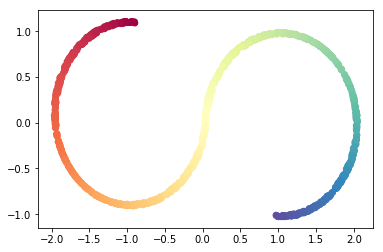

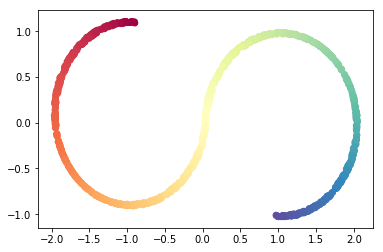

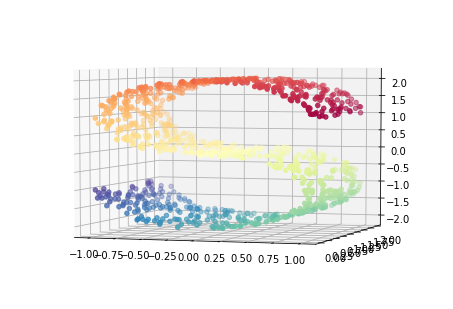

In [38]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))



fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

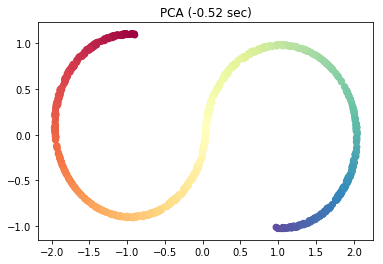

In [41]:
t0 = time()

pca = PCA(n_components=2)
Y = pca.fit_transform(X)
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

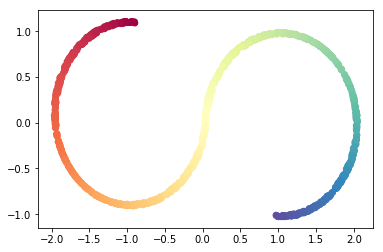

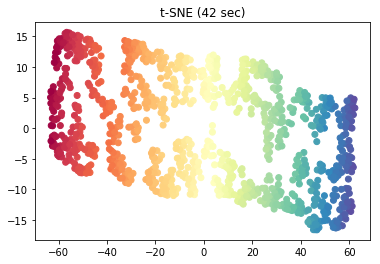

In [40]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

#### Further resources
+ The original t-SNE paper:
  [L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using t-SNE. Journal of Machine Learning Research 9, 2008](https://lvdmaaten.github.io/publications/papers/AISTATS_2009.pdf)
+ A more accessible [Google Techtalk introduction video](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw)

### Uniform Manifold Approximation and Projection (UMAP)

UMAP is a new manifold learning algorithm (published in 2018), which is claimed to produce results of similar (or even higher) quality to t-SNE but a magnitude faster.

The algorithm works by modeling the manifold by a fuzzy topological structure built on the basis of the neighborhood relationships and distances between the data points. This topological structure, in turn is represented by a weighted graph between the data points, e.g., the sinusoid-based data set 

<a href="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_raw_data.png"><img src="https://drive.google.com/uc?export=view&id=1zPbSroeCkEh2Ox2UTdrozCLFGJ0T-rMH" width="500px"></a>

leads to the

<a href="https://umap-learn.readthedocs.io/en/latest/_images/how_umap_works_umap_graph.png"><img src="https://drive.google.com/uc?export=view&id=1VOPAItEtU57rlvziACngx3W7sGnGfTov" width="500px"></a>

weighted graph.

(Image source: [How UMAP works](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html))

Having produced the weighted graph representation, UMAP, similarly to t-SNE, finds the best low-dimensional representation by minimizing the cross-entropy between distributions corresponding to the source-domain graph and the target-domain data set using gradient descent.

Using a number of speed-up tricks (considering only close neighbors, using a smooth approximation of the objective etc.) UMAP manages to be significantly faster than t-SNE, e.g., on subsets of the MNIST data set the speed measurements (by the UMAP team) were:

<a href="https://umap-learn.readthedocs.io/en/latest/_images/performance_20_1.png"><img src="https://drive.google.com/uc?export=view&id=1GHnVzOoY1uiG-kmOG3f1hsMa2cCx7PBH" width="700px"></a>

(Image source: [How UMAP works](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html))

#### Further resources

- [How UMAP works](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html) -- a relatively easy-going description in the UMAP user guide.
- The UMAP paper: [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426)
- Official UMAP implementation: https://github.com/lmcinnes/umap

### Self Organizing Map (SOM)

* Developed in  the 1980s by Teuvo Kohonen Finnish AI researcher .
* Unsupervised method.
* Produces a nonlinear mapping from a high dimensional feature space to a low (typically two) dimensional __discrete__ map 
* Uses a neural network with a special topology and learning rule.

#### Neural network
 
A network for a mapping from an $n$-dimensional space consists of neurons arranged in the form of a 2- (or rarely 3-) dimensional map -- with each neuron having $n$ weights.

<a href="https://codesachin.files.wordpress.com/2015/11/kohonen1.gif"><img src="https://drive.google.com/uc?export=view&id=10TCnWjWz0d5R673rKhNFNdMBVLHrER0t"></a>

(image source: [Sachin Joglekar: SOMs with TensorFlow](https://codesachin.wordpress.com/2015/11/28/self-organizing-maps-with-googles-tensorflow/))

#### Training

<a href="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Somtraining.svg/500px-Somtraining.svg.png"><img src="https://drive.google.com/uc?export=view&id=123JLLtNGrXuFGJAQO4c6kvypslNjQA-K"></a>

Training uses so called "competitive learning". Starting with a network with randomly initialized weights the following steps are performed for each data point:

* Find the neuron whose weights are closest to the data point -- this will be the current Best Matching Unit (BMU). 
* Adjust the weights of the BMU neuron to be closer to that data point. The amount of adjustment  is determined by a learning rate which decreases after each iteration.
* Also adjust the BMU’s neighbors' weights to be closer to that data point as well, with farther neighbors adjusted less. The "neigborhood radius" is also decreasing during training.

The above steps are repeated (typically many times for the whole data set) until the weights of the network stabilize.

<a href="http://drive.google.com/uc?export=view&id=1ehPHe86CXAS-eitjDN2GB2LPZl7Lgjif"><img src="https://drive.google.com/uc?export=view&id=1r6WAPCkllm7hhGRre-T3HiFojD751BgZ" width=65%></a>

[source](https://www.youtube.com/watch?v=abF_FdCb5OI)



#### Mapping

After training an input data point is mapped simply to the place of the BMU neuron.



#### Resulting Maps

In addition to arranging similar datapoints into clusters, SOMs are good at placing similar clusters close to each other.

Some examples:

Map taught with only 10 example colors as RGB triplets:

<a href="http://jjguy.com/som/somcolor-after.png"><img src="https://drive.google.com/uc?export=view&id=1fIQQOxaO4hxNt7QBknKjB4SoP6v5GCHE" width="500"></a>

(Image source: http://jjguy.com/som/ where the training process can be seen live)


Typical applications include mapping documents, e.g. this map does it with Wikipedia articles:
<a href="https://upload.wikimedia.org/wikipedia/commons/0/07/Self_oraganizing_map_cartography.jpg"><img src="https://drive.google.com/uc?export=view&id=1Bg2hOn233sE7uUm3CrHvLP3dgwONte2K" width="600"></a>

("mountains" are just cluster border visualisations)

(image source: https://en.wikipedia.org/wiki/Self-organizing_map)

#### Disadvantages

+ Training can be computationally expensive
+ The mapping is discrete
+ Does not work well with categorical data

#### Further reading

+ [Algobeans SOM tutorial](https://algobeans.com/2017/11/02/self-organizing-map/)
+ [Simple SOM training demos](http://jjguy.com/som/)





Though we tried to cover the more important forms of dimensionality reduction techniques, we can by no means claim full coverage, **many more techniques exist**. A nice summary of tips and methods can be found in the **[Ten quick tips for effective dimensionality reduction
](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006907)**.

<a id="modeling"></a>
# Modeling and representation

Representation learning has deep connections with visualization - namely dimensionality reduction allows us to project high dimensional data onto 2D or 3D planes so that we can visually inspect them.

But the main usefulness of representation (inspired) methods lies in their "combination" with classification and regression methods as "prior" "embedding" steps. This approach is mainly used in so called kernel methods.

## Kernel methods

### The advantages of "exploding the feature space"
As we have just seen, dimension reduction has many advantages, but other types of feature space transformations can also be useful in certain situations. For instance, as the case of polynomial regression demonstrated, "exploding the feature space" that is, transforming the data into a higher dimensional feature space can also serve us when we would like to use a model whose parameters are linear in its input feature space (e.g., linear regression or classification methods with linear decision boundaries) to find nonlinear patterns (e.g. nonlinear decision boundaries). The trick is, of course, to apply a nonlinear transformation to the data and use the method to find parameters (e.g. decision boundaries) that are linear in the new feature space but nonlinear in the original one:

<a href="https://journals.plos.org/ploscompbiol/article/figure/image?download&size=large&id=info:doi/10.1371/journal.pcbi.1000173.g006"><img  src="https://drive.google.com/uc?export=view&id=1a_gFPOQCq7Uk78jD6Ibqxe1Bm5P3MfCA"></a>



In its most general form, transforming the feature space is to use a new set of feature vectors $$\{\phi(\mathbf x_1),\dots,\phi(\mathbf x_N)\}$$ for training instead of the original $\{\mathbf x_1,\dots,\mathbf x_N\}$ data where $\phi$ is any function mapping vectors to vectors. In the case of a one-variable polynomial regression $\phi$ is simply the mapping

$$
\phi(\langle x\rangle) = \langle x, x^2,\dots,x^m \rangle.
$$


<a href="https://pbs.twimg.com/media/DJJKZR2XgAAliTi.jpg"><img src="https://drive.google.com/uc?export=view&id=1V4r6zWg8Q41W0MtsP8ZfgjijCQrcmJgU" width=400 heigth=400></a>

### But what about the curse of dimensionality?
When $\phi$ increases the number of dimensions/features we may be faced with the by now familiar problems of high dimensionality:

1. ML on high dimensional data is computationally expensive (both for memory and time, and frequently prohibitively so).
2. In the new high dimensional feature space our data becomes sparse and this can lead to overfitting.

We will return the second problem later, but, somewhat surprisingly, the first concern in many cases can be addressed by a clever move: Instead of _explicitly_ expanding the feature space, we can keep working with the original data and modify our algorithms to work in a way which _implicitly_ assumes an expanded feature space, but does not have the computational cost of explicit expansion. Methods using this solution are called "kernel methods" and the technique is frequently called the "kernel trick". 

### The kernel trick

The main observation on which the technique relies is that many ML algorithms (e.g., linear regression, SVM) can be rewritten in a form which does not refer to vectors in the input feature space explicitly but only implicitly via their _dot product_. For algorithms rewritten in this, so called _kernelized_ form it is enough to replace all references to the dot products of vectors in the input space, e.g., $\mathbf x \cdot \mathbf y$ with $\phi(\mathbf x) \cdot \phi(\mathbf y)$ to get a version which implicitly works in the transformed feature space, but does not require explicit feature mapping.

To demonstrate how accessing a high dimensional feature space only implicitly, in the form of dot products can be useful consider the feature map

$$
\phi(\langle x_1,x_2 \rangle) = \langle 1, x_1^2, x_2^2, \sqrt 2 x_1, \sqrt 2 x_2, \sqrt 2 x_1 x_2 \rangle.
$$

Because of the presence of the combined feature $\sqrt 2 x_1 x_2$ and quadratic features $\sqrt 2 x_1^2$ and $\sqrt 2 x_2^2$ this seems like a useful nonlinear feature expansion, albeit a bit complex. But much of the complexity vanishes if we have to calculate only the dot product of two transformed vectors, since

$$
\phi(\mathbf x) \cdot \phi(\mathbf y) = \langle 1, x_1^2, x_2^2, \sqrt 2 x_1, \sqrt 2 x_2, \sqrt 2 x_1 x_2 \rangle \cdot 
\langle 1, y_1^2, y_2^2, \sqrt 2 y_1, \sqrt 2 y_2, \sqrt 2 y_1 y_2 \rangle =
$$

$$
1 + x_1^2 y_1^2 + x_2^2 y_2^2 + 2x_1 y_1  + 2 x_2 y_2  + 2 x_1 y_1 x_2 y_2 = (1 + x_1 y_1 + x_2 y_2)^2 = (1 + \mathbf x \cdot \mathbf y)^2
$$
that is, compared to calculating $\mathbf x \cdot \mathbf y$ we have only a simple scalar addition and multiplication as added difficulty, but in exchange we are _implicitly_ operating over a 6-dimensional quadratic feature space.


### Kernel functions
The two-variable $K(\mathbf x,\mathbf y) = \phi(\mathbf x) \cdot \phi(\mathbf x)$ 
functions with which dot products are replaced when the kernel trick is applied are collectively known as kernel functions or kernels for short: any function is a kernel if it can be written in this form with some $\phi$ feature map. 

In addition to the above straightforward characterization, there are other, way more technical conditions of "kernelhood" that do not require explicitly this form but from which the possibility  of rewriting the function into this form follows (although the underlying feature mapping is not guaranteed to be especially tidy or even finite dimensional!!!), most notably that the function should be [positive semi-definite](https://en.wikipedia.org/wiki/Positive-definite_function) or, equivalently, should satisfy [Mercer's condition](https://en.wikipedia.org/wiki/Mercer%27s_theorem#Mercer%27s_condition). Unfortunately, the details are beyond the scope of this course.

The advantage of these more abstract characterizations is that they can be used to prove 

- that certain functions are kernels for which this is far from obvious (e.g. Gaussian kernels, see below).
- some general properties of kernels that are very useful for constructing complex kernels from simpler ones: The most important fact here is that
> any positive linear combination of kernels is also a kernel.

**Warning:** Sometimes the literature uses "kernel" in a much more general sense to denote any two-variable real valued function which is used as a similarity measure between its arguments.

### Kernelization and instance based methods
An important consequence of kernelization for many algorithms is that they become instance-based, i.e., in addition to learned parameters, they also need to store some individual training examples in memory in order to be able to predict.

The reason is that in many cases the non-kernelized versions of these algorithms learn one ore more vectors in the feature space as parameters (e.g. a normal vector of a separating hyperplane), and these parameters are no more explicitly representable after kernelization. The typical solution is to prove a so called **representer theorem** stating that such learned parameters can be written as linear combination of vectors in the image of training data according to the kernel's implicit feature mapping, that is, for those $p$ parameters

$$
p = \sum_{i=1}^N \alpha_i\phi(\mathbf x_i)
$$

for some $\alpha_i$ parameters and the training data. 

For many kernelized models and datasets most of the $\alpha_i$-s will be $0$, i.e., $p$ will be a linear combination of the value of $\phi$ for a few of the data points. Since the learned parameters are used only in dot products with other $\phi$ values (e.g. when calculating on which side of a hyperplane a point's image is located in a binary classifier), the explicit computation of $\phi$ values can be avoided by the kernel trick:

$$
p \cdot \phi(\mathbf z) = \left(\sum_{i=1}^N \alpha_i\phi(\mathbf x_i)\right) \cdot \phi(\mathbf z) = \sum_{i=1}^N \alpha_i\phi(\mathbf x_i) \cdot \phi(\mathbf z) = \sum_{i=1}^N \alpha_i K(\mathbf x_i, \mathbf z)
$$
but this still requires the storage of the non-zero $\alpha_i$ and $\mathbf x_i$ components of $p$'s representation, i.e. the storage and use of some of the training data.

### ML algorithms/methods with kernelized versions
A huge number of popular ML algorithms/methods have kernelized versions. Some of the most important ones are
* SVM (!!! this is by far the most important one)
* Ridge regression
* Logistic regression
* Perceptron (which we will meet later)
* PCA
* Linear discriminant analysis
* K-means

### Popular kernels

Some of the widely used kernels are

* **Linear kernel**: $K(\mathbf x, \mathbf y)=\mathbf x \cdot \mathbf y$: This is the kernel without any feature mapping (or with the identity feature mapping), which is used with kernelized algorithms when no feature mapping is needed.
* **Polynomial kernels**: kernels of the form $K(\mathbf x, \mathbf y) = (1+ \mathbf x \cdot \mathbf y)^n$ where $n$ is an integer -- these kernels correspond to polynomial feature mappings (we have seen an instance as an example above).
* **Gaussian or RBF (Radial Basis Function) kernels**: kernels of the form 
$$K(\mathbf x, \mathbf y) = \exp(-\frac{\|\mathbf x-\mathbf y\|^2}{2\sigma^2}).$$
Can be seen as inducing a nonlinear, Gaussian weighted distance metric on the original feature space. On the other hand, the "implicit feature mapping" behind them is infinite dimensional as can be shown by using the Taylor series expansion of the exponential function. (See, e.g., [these slides](https://www.csie.ntu.edu.tw/~cjlin/talks/kuleuven_svm.pdf) for details.)
* **String kernels**: These kernels operate on strings and measure their similarity in various ways, e.g., they can measure the number of substrings that occur in both of them (strings are from alphabet $A$):
$$K(\mathbf x, \mathbf y) = \sum_{s\in A^*}w_s c_s(\mathbf x)c_s(\mathbf y)$$
where $c_s(\mathbf x)$ is the number of occurrences of $s$ in $\mathbf x$ as a substring, and $w_s$ is a weight belonging to $s$. Similarly to the Gaussian kernel, the underlying feature space has an inifinite number of dimensions but here -- in contrast to the Gaussian -- the used feature mapping is fairly obvious.

<a href="https://qph.fs.quoracdn.net/main-qimg-c7f5c6f1fc6d4be7daaaf82d975e226e"><img src="https://drive.google.com/uc?export=view&id=18m62kM_rPK7PHTz29W8D_XVAEUWwcVxK" width=600 heigth=600></a>

### Kernel methods and overfitting
Fortunately, despite the implicit use of high dimensional feature spaces, the usual means of avoiding overfitting, i.e.,  regularization and careful, cross-validation based hyperparameter tuning work well with kernel methods. Moreover, in the case of kernel SVM, which is the most frequently used kernel method, experience and some theoretical results from learning theory show that the (properly set) max margin objective already acts as a very strong regularizer (capacity limiter), see e.g. [this presentation](https://www.cs.utah.edu/~piyush/teaching/27-9-print.pdf) for some details.

<a id="repragain"></a>
# Understanding representation learning

- **Memorization:**

Like KNN, it is pure "remembering", basically a database learner, or a "lookup table", where we just query the similar items. The database is itself it's own model, no compression.

If we imagine, even a linear model captures "the essence" of a relationship in the data, every point contributes to the "memory" - good illustration: problems with outliers and robust regression methods - remembering the "false" signal, even with high "leverage".

We can conclude: every model memorizes. The question is: For any kind of more abstract model, we would like it to memorize "the gist of the relationship", that is to "generalize". (See problem of overfitting) To avoid this, we would like the model to be the most "concise" description of the relationship (Occam factor).

- **Compression / hashing (capturing most salient features)**

Concisely describing something can be understood as a form of lossful compression. We can compress something if we can substitute it's description to a more compact one (see the whole literature on information theory and compression), which is only possible, if we capture something deeply descriptive about the phenomena. To put it another way, if we capture the "salient" features of the data, we can describe it short, thus our "understanding" (model) of it is good. This is the motivation behind the [Hutter prize](https://en.wikipedia.org/wiki/Hutter_Prize) which is a prize for compressing 100Mb of Wikipedia texts - and it *is* an AI prize!

[Hashing](https://en.wikipedia.org/wiki/Hash_function) is in connection with compression ("mapping data of arbitrary size to data of a fixed size"), meaning the systematic mapping of one representation to another, which can be understood as a function.

- **Function application on space**

Learning or engineering of features from raw data is the creation of (successive) transformations (in the form of functions) that are applied to the data to bring it's salient features into the foreground, so as to enable it's compression, representation in a lower dimensional space. 

- **"Embed and cut"**

Since the lower dimensional space of features captures the essence of phenomena, it is suitable as an input for a (linear) classification. The "signal" is the distance / separability of classes, the "noise" is the scatteredness of classes. (Connection with [Fisher information](https://en.wikipedia.org/wiki/Fisher_information#Matrix_form))

**Conclusion: you need only a simple classifier, but over a very good (learned representation).**

**_Representation is everything_.**

# Summary of "classical" methods

Scikit has a nice - but naturally very oversimplified - "decision tree" about the estimators it incorporates.Many times it is worth checking. 

<a href="https://scikit-learn.org/stable/_static/ml_map.png"><img src="https://drive.google.com/uc?export=view&id=1gMslwxuLSZp_PfooZLjYGFyZKxhlktPg" width=85%></a>

[Source](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

But for more complex, high dimensional problems we will have to go further in the direction of **deep learning**.